In [1]:
####  Adding required packages

In [2]:
using Pkg

In [3]:
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("SQLite")
Pkg.add("Dates")
Pkg.add("Tables")
Pkg.add("Plots")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %]  45.1 %=====================================>   ]  90.6 % Resolving package versions...
 Installed DiffRules ── v0.0.10
 Installed MacroTools ─ v0.4.5
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [b552c78f] ↑ DiffRules v0.0.9 ⇒ v0.0.10
  [1914dd2f] ↑ MacroTools v0.4.4 ⇒ v0.4.5
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/env

In [4]:
using CSV
using DataFrames
using SQLite
using Dates
using Tables
using Plots

In [5]:
#### Assigning path to all the tables

In [6]:
path = "/Users/adityakamboj/Desktop/Data Integrity/ord.csv"

"/Users/adityakamboj/Desktop/Data Integrity/ord.csv"

In [7]:
path1 = "/Users/adityakamboj/Desktop/Data Integrity/orderitem.csv"

"/Users/adityakamboj/Desktop/Data Integrity/orderitem.csv"

In [8]:
path2 = "/Users/adityakamboj/Desktop/Data Integrity/product.csv"

"/Users/adityakamboj/Desktop/Data Integrity/product.csv"

In [9]:
path3 = "/Users/adityakamboj/Desktop/Data Integrity/customer.csv"

"/Users/adityakamboj/Desktop/Data Integrity/customer.csv"

In [14]:
path4 = "/Users/adityakamboj/Desktop/Data Integrity/supplier.csv"

"/Users/adityakamboj/Desktop/Data Integrity/supplier.csv"

In [11]:
#### Reading CSV files and ignoring 'quotes' in the data but first we need to create a function to parse dates

In [12]:
function mydate(str)
    if endswith(str, "PM")
        return DateTime(str, dateformat"uuu dd yyyy HH:MM:SS:sss\P\M") + Dates.Hour(12)
    else
        return DateTime(str, dateformat"uuu dd yyyy HH:MM:SS:sss\A\M")
    end
end        

mydate (generic function with 1 method)

In [13]:
ord = CSV.File(path; quotechar='\'') |> Tables.transform(orderdate=mydate) |> DataFrame

,Id,OrderDate,CustomerId,TotalAmount,OrderNumber
,Int64,DateTime,Int64,Float64,Int64
1,1,2012-07-04T12:00:00,85,440.0,542378
2,2,2012-07-05T12:00:00,79,1863.4,542379
3,3,2012-07-08T12:00:00,34,1813.0,542380
4,4,2012-07-08T12:00:00,84,670.8,542381
5,5,2012-07-09T12:00:00,76,3730.0,542382
6,6,2012-07-10T12:00:00,34,1444.8,542383
7,7,2012-07-11T12:00:00,14,625.2,542384
8,8,2012-07-12T12:00:00,68,2490.5,542385
9,9,2012-07-15T12:00:00,88,517.8,542386


In [57]:
orderitem = CSV.File(path1)

CSV.File("/Users/adityakamboj/Desktop/Data Integrity/orderitem.csv", rows=2155):
Tables.Schema:
 :Id         Union{Missing, Int64}  
 :OrderId    Union{Missing, Int64}  
 :ProductId  Union{Missing, Int64}  
 :UnitPrice  Union{Missing, Float64}
 :Quantity   Union{Missing, Int64}  

In [58]:
product = CSV.File(path2; quotechar='\'')

CSV.File("/Users/adityakamboj/Desktop/Data Integrity/product.csv", rows=78):
Tables.Schema:
 :Id              Union{Missing, Int64}  
 :ProductName     Union{Missing, String} 
 :SupplierId      Union{Missing, Int64}  
 :UnitPrice       Union{Missing, Float64}
 :Package         Union{Missing, String} 
 :IsDiscontinued  Union{Missing, Int64}  

In [43]:
customer = CSV.File(path3; quotechar='\'')

CSV.File("/Users/adityakamboj/Desktop/Data Integrity/customer.csv", rows=91):
Tables.Schema:
 :Id         Union{Missing, Int64} 
 :FirstName  Union{Missing, String}
 :LastName   Union{Missing, String}
 :City       Union{Missing, String}
 :Country    Union{Missing, String}
 :Phone      Union{Missing, String}

In [15]:
supplier = CSV.File(path4; quotechar='\'')

CSV.File("/Users/adityakamboj/Desktop/Data Integrity/supplier.csv", rows=30):
Tables.Schema:
 :Id           Union{Missing, Int64} 
 :CompanyName  Union{Missing, String}
 :ContactName  Union{Missing, String}
 :City         Union{Missing, String}
 :Country      Union{Missing, String}
 :Phone        Union{Missing, String}
 :Fax          Union{Missing, String}

In [122]:
#### Loading data in DB

In [18]:
acme = SQLite.DB()  

SQLite.load!(ord, acme, "ord")

"ord"

In [56]:
SQLite.load!(orderitem, acme, "orderitem")

"orderitem"

In [47]:
SQLite.load!(product, acme, "product")

"product"

In [48]:
SQLite.load!(customer, acme, "customer")

"customer"

In [19]:
SQLite.load!(supplier, acme, "supplier")

"supplier"

In [39]:
DataFrame(SQLite.Query(acme,"""select * from ord
        limit 5
        """))

,Id,OrderDate,CustomerId,TotalAmount,OrderNumber
,Int64⍰,String⍰,Int64⍰,Float64⍰,Int64⍰
1,1,2012-07-04T12:00:00,85,440.0,542378
2,2,2012-07-05T12:00:00,79,1863.4,542379
3,3,2012-07-08T12:00:00,34,1813.0,542380
4,4,2012-07-08T12:00:00,84,670.8,542381
5,5,2012-07-09T12:00:00,76,3730.0,542382


In [54]:
DataFrame(SQLite.Query(acme,"""select * from orderitem
        limit 5
        """))

,Id,OrderId,ProductId,UnitPrice,Quantity
,Int64⍰,Int64⍰,Int64⍰,Float64⍰,Int64⍰
1,1,1,11,14.0,12
2,2,1,42,9.8,10
3,3,1,72,34.8,5
4,4,2,14,18.6,9
5,5,2,51,42.4,40


In [55]:
DataFrame(SQLite.Query(acme,"""select * from product
        limit 5
        """))

,Id,ProductName,SupplierId,UnitPrice,Package,IsDiscontinued
,Int64⍰,String⍰,Int64⍰,Float64⍰,String⍰,Int64⍰
1,1,Chai,1,18.0,10 boxes x 20 bags,0
2,2,Chang,1,19.0,24 - 12 oz bottles,0
3,3,Aniseed Syrup,1,10.0,12 - 550 ml bottles,0
4,4,Chef Antons Cajun Seasoning,2,22.0,48 - 6 oz jars,0
5,5,Chef Antons Gumbo Mix,2,21.35,36 boxes,1


In [22]:
DataFrame(SQLite.Query(acme,"""select * from customer
        limit 5
        """))

,Id,FirstName,LastName,City,Country,Phone
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,1,Maria,Anders,Berlin,Germany,030-0074321
2,2,Ana,Trujillo,México D.F.,Mexico,(5) 555-4729
3,3,Antonio,Moreno,México D.F.,Mexico,(5) 555-3932
4,4,Thomas,Hardy,London,UK,(171) 555-7788
5,5,Christina,Berglund,Luleå,Sweden,0921-12 34 65


In [23]:
DataFrame(SQLite.Query(acme,"""select * from suppl
        limit 5
        """))

,Id,CompanyName,ContactName,City,Country,Phone
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,1,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222
2,1,Exotic Liquids,Charlotte Cooper,London,UK,(171) 555-2222
3,2,New Orleans Cajun Delights,Shelley Burke,New Orleans,USA,(100) 555-4822
4,3,Grandma Kelly's Homestead,Regina Murphy,Ann Arbor,USA,(313) 555-5735
5,7,Pavlova Ltd.,Ian Devling,Melbourne,Australia,(06) 431-7877


## 1.	Sales analysis
#### Company’s sales trend over time?

In [97]:
SalesTrend = DataFrame(SQLite.Query(acme,"""select strftime('%Y-%m',OrderDate) Months, 
avg(TotalAmount) as sales
        from ord 
        group by Months
        order by Months
        """))


,Months,sales
,String⍰,Float64⍰
1,2012-07,1372.37
2,2012-08,1064.38
3,2012-09,1201.57
4,2012-10,1584.75
5,2012-11,1988.16
6,2012-12,1643.66
7,2013-01,2020.99
8,2013-02,1420.94
9,2013-03,1332.66


In [96]:
gr()

Plots.GRBackend()

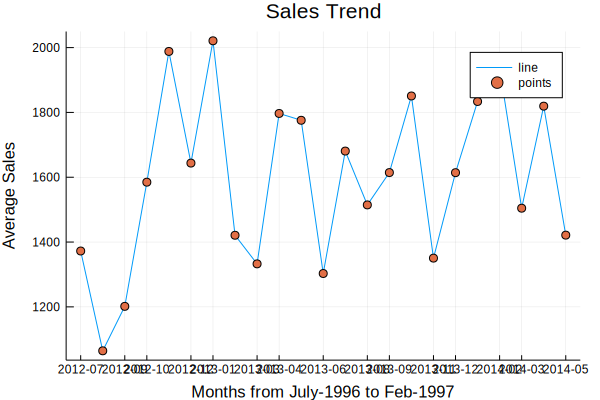

In [99]:
plot(SalesTrend[:,1], SalesTrend[:,2], label = "line")
scatter!(SalesTrend[:,1], SalesTrend[:,2], label = "points")
xlabel!("Months from July-1996 to Feb-1997")
ylabel!("Average Sales")
title!("Sales Trend")

## 2.	Product Analysis
#### Product popularity by quantity sold since inception 

In [29]:
# see if you only output continued products
Prod = DataFrame(SQLite.Query(acme,"""select productname, sum(Quantity) as Total_Qty
        from product join orderitem on product.id = orderitem.productid
        group by productname 
        order by Total_Qty desc
        """))

,ProductName,Total_Qty
,String⍰,Int64⍰
1,Camembert Pierrot,1577
2,Raclette Courdavault,1496
3,Gorgonzola Telino,1397
4,Gnocchi di nonna Alice,1263
5,Pavlova,1158
6,Rhönbräu Klosterbier,1155
7,Guaraná Fantástica,1125
8,Boston Crab Meat,1103
9,Tarte au sucre,1083


In [100]:
Pkg.build("NodeJS")
Pkg.add("VegaLite")

  Building NodeJS → `~/.julia/packages/NodeJS/rx0mH/deps/build.log`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [101]:
using VegaLite

┌ Info: Recompiling stale cache file /Users/adityakamboj/.julia/compiled/v1.0/VegaLite/lrJqi.ji for VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1190


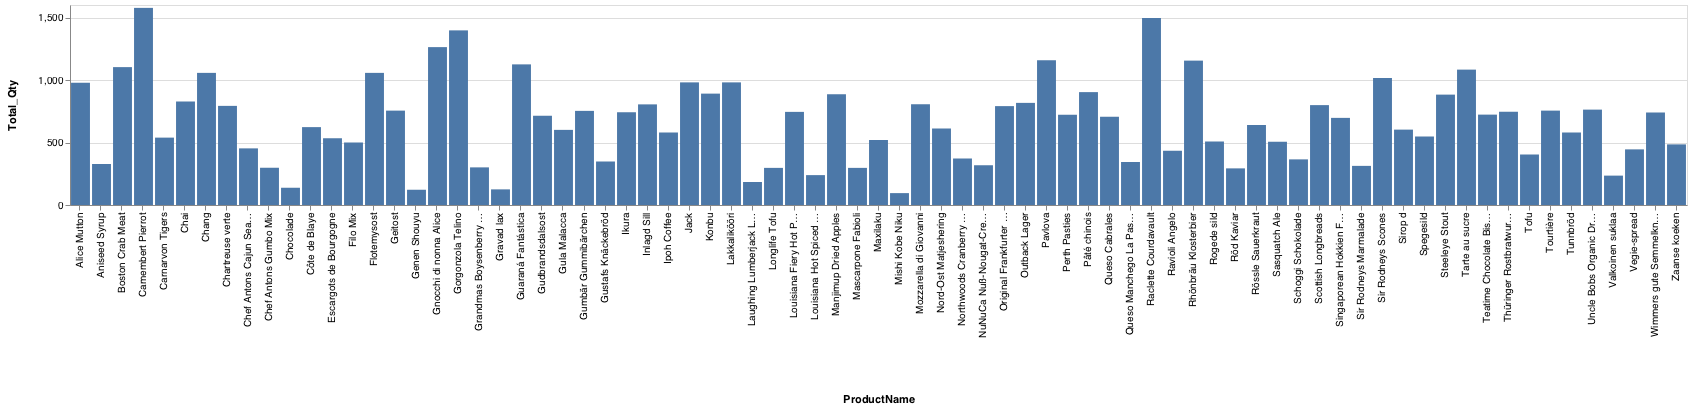

In [102]:
Prod |> @vlplot(:bar, x=:ProductName, y=:Total_Qty)

#### Top 10 revenue generating products in the Fiscal Year

In [63]:
TopTenProd = DataFrame(SQLite.Query(acme,"""select productname, sum(orderitem.unitprice*quantity) as sales
from product join orderitem on product.id = orderitem.productid
        join ord on orderitem.orderid = ord.id
        where orderdate between '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
        group by productname
        order by sales desc
        limit 10"""
))    

,ProductName,sales
,String⍰,Float64⍰
1,Côte de Blaye,178653.0
2,Thüringer Rostbratwurst,1.29732e5
3,Raclette Courdavault,104280.0
4,Manjimup Dried Apples,71762.0
5,Tarte au sucre,70992.0
6,Camembert Pierrot,66572.0
7,Gnocchi di nonna Alice,58900.0
8,Alice Mutton,49686.0
9,Carnarvon Tigers,47250.0


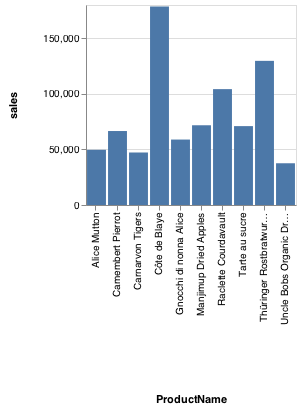

In [103]:
TopTenProd |> @vlplot(:bar, x=:ProductName, y=:sales)

#### Products that have not been ordered in the past three months as measured from Fiscal Year End

In [66]:
DataFrame(SQLite.Query(acme,"""SELECT Product.ID, ProductName
FROM Product
WHERE Product.ID NOT IN (
    SELECT DISTINCT Product.ID
    FROM Product
    join Orderitem ON product.id = orderitem.productid
    join Ord ON Ord.Id = Orderitem.OrderId
    where Ord.OrderDate between '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
)"""))  

,Id,ProductName
,Int64⍰,String⍰
1,78,Stroopwafels


## 3.	Customer Analysis
#### Fiscal year Revenue by customer’s Country

In [70]:
CustomerCountry = DataFrame(SQLite.Query(acme,"""select country, sum(orderitem.unitprice*quantity) as Revenue
        from customer inner join ord on customer.id = ord.customerid
        inner join orderitem on ord.id = orderitem.orderid
        inner join product on orderitem.productid = product.id
        where orderdate between '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
        group by country
        order by Revenue desc"""))

,Country,Revenue
,String⍰,Float64⍰
1,USA,3.75177e5
2,Germany,3.48377e5
3,Austria,1.67685e5
4,Brazil,154073.0
5,Sweden,1.00615e5
6,France,97208.5
7,UK,86622.2
8,Ireland,80687.8
9,Venezuela,78114.0


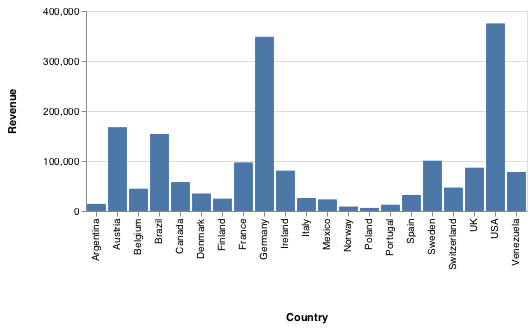

In [104]:
CustomerCountry |> @vlplot(:bar, x=:Country, y=:Revenue)

#### Top 10 customers by revenue during Fiscal year

In [76]:
top10Cust = DataFrame(SQLite.Query(acme,"""select customer.id, Firstname, Lastname, sum(product.unitprice*quantity) as Revenue
from customer inner join ord on ord.customerid = customer.id
inner join orderitem on ord.id = orderitem.orderid
inner join product on orderitem.productID = product.id
where  orderdate between '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
group by customer.id
order by Revenue desc
limit 10"""))

,Id,FirstName,LastName,Revenue
,Int64⍰,String⍰,String⍰,Float64⍰
1,71,Jose,Pavarotti,1.81709e5
2,63,Horst,Kloss,1.76169e5
3,20,Roland,Mendel,1.41835e5
4,37,Patricia,McKenna,80687.8
5,34,Mario,Pontes,61686.7
6,24,Maria,Larsson,57741.1
7,39,Philip,Cramer,53329.5
8,65,Paula,Wilson,51291.0
9,89,Karl,Jablonski,44646.9


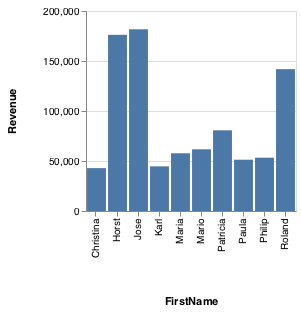

In [107]:
top10Cust |> @vlplot(:bar, x=:FirstName, y=:Revenue)

#### Customers are acquired each month

In [79]:
CustomersAcquired = DataFrame(SQLite.Query(acme,"""Select count(distinct(Customer.id)) as Customer_Count, strftime('%Y-%m', orderdate) as Months
from Customer
join Ord on 
Ord.CustomerID = Customer.ID
join OrderItem on
ord.ID = Orderitem.orderID
join product on
product.Id = orderitem.productID
group by Months
order by Months
        """))

,Customer_Count,Months
,Int64⍰,String⍰
1,20,2012-07
2,18,2012-08
3,19,2012-09
4,20,2012-10
5,21,2012-11
6,25,2012-12
7,27,2013-01
8,21,2013-02
9,24,2013-03


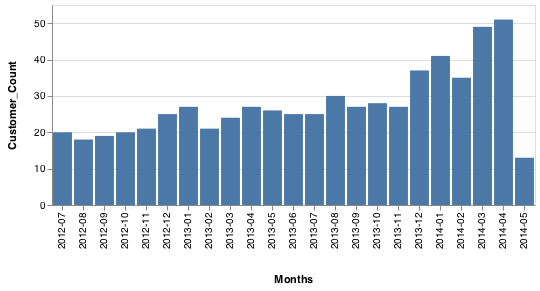

In [109]:
CustomersAcquired |> @vlplot(:bar, x=:Months, y=:Customer_Count)

#### Customers are deemed attrited in the database

In [83]:
DataFrame(SQLite.Query(acme,"""SELECT customer.*
FROM Customer 
LEFT JOIN Ord
    ON ord.CustomerID = Customer.ID 
    AND ord.OrderDate BETWEEN '2013-11-30T12:00:00' and '2014-05-31T12:00:00'
WHERE ord.ID IS NULL
"""))

,Id,FirstName,LastName,City,Country,Phone
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,13,Francisco,Chang,México D.F.,Mexico,(5) 555-3392
2,21,Aria,Cruz,Sao Paulo,Brazil,(11) 555-9857
3,22,Diego,Roel,Madrid,Spain,(91) 555 94 44
4,36,Yoshi,Latimer,Elgin,USA,(503) 555-6874
5,43,John,Steel,Walla Walla,USA,(509) 555-7969
6,51,Jean,Fresnière,Montréal,Canada,(514) 555-8054
7,57,Marie,Bertrand,Paris,France,(1) 42.34.22.66
8,85,Paul,Henriot,Reims,France,26.47.15.10


## 4.	Supplier Analysis
#### Fiscal year Revenue by supplier Country

In [87]:
RevenueSupplierCountry = DataFrame(SQLite.Query(acme,"""select country, sum(product.unitprice*quantity) as Revenue from Suppl
inner join Product on Suppl.ID = Product.SupplierID
inner join orderitem on Product.ID = OrderItem.ProductID
inner join Ord on OrderItem.OrderID = Ord.ID
where orderdate < '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
group by country
order by Revenue desc
        """))

,Country,Revenue
,String⍰,Float64⍰
1,France,2.66176e5
2,Germany,1.64443e5
3,Australia,1.35952e5
4,USA,92285.8
5,UK,91731.6
6,Italy,86384.0
7,Canada,72279.3
8,Singapore,34729.6
9,Norway,34278.0


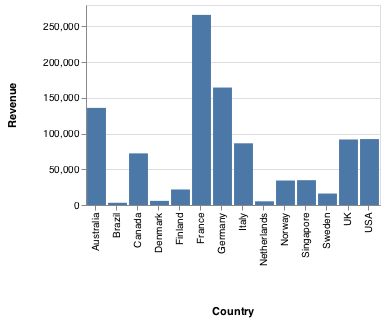

In [110]:
RevenueSupplierCountry |> @vlplot(:bar, x=:Country, y=:Revenue)

#### Top 3 supplier of Fiscal year and their business volume 

In [92]:
Top3Supplier = DataFrame(SQLite.Query(acme,"""select sum(product.unitprice*quantity) Revenue, CompanyName, suppl.id from suppl 
inner join product on suppl.id = product.SupplierID
inner join orderitem on product.id = orderitem.productid
inner join ord on orderitem.OrderID = Ord.id
where orderdate between '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
group by CompanyName
order by revenue desc
limit 3
        """))

,Revenue,CompanyName,Id
,Float64⍰,String⍰,Int64⍰
1,2.10147e5,Plutzer Lebensmittelgroßmärkte AG,12
2,194817.0,Aux joyeux ecclésiastiques,18
3,170852.0,Gai pâturage,28


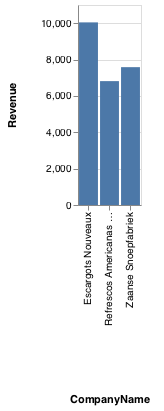

In [112]:
Top3Supplier |> @vlplot(:bar, x=:CompanyName, y=:Revenue)

#### Bottom 3 volume suppliers during Fiscal year

In [114]:
BottomSupplier = DataFrame(SQLite.Query(acme,"""select sum(product.unitprice*quantity) Revenue, CompanyName, suppl.id from suppl 
inner join product on suppl.id = product.SupplierID
inner join orderitem on product.id = orderitem.productid
inner join ord on orderitem.OrderID = Ord.id
where orderdate between '2013-04-31T12:00:00' and '2014-05-01T12:00:00'
group by CompanyName
order by revenue 
limit 3
        """))

,Revenue,CompanyName,Id
,Float64⍰,String⍰,Int64⍰
1,6813.0,Refrescos Americanas LTDA,10
2,7581.0,Zaanse Snoepfabriek,22
3,10043.5,Escargots Nouveaux,27


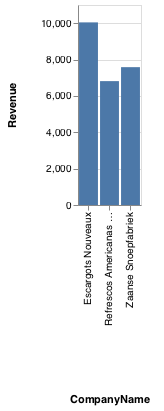

In [116]:
BottomSupplier |> @vlplot(:bar, x=:CompanyName, y=:Revenue)